# Tutorial Feb 1st

In [1]:
cd(joinpath(pwd(),".."))

using Pkg
Pkg.activate(".")

 Activating environment at `C:\Users\paulc\.julia\dev\ECON627_2020\Project.toml`


In [3]:
using LinearAlgebra, SparseArrays

Consider the system of equations given by 
$$ A x = b $$ 

For example, we let $A = \Pi'$, $x = \gamma_1$, and $b = \pi'$. 


Denote $A^{\dagger}$ as the pseudo-inverse of $A$. The properties of the pseudo-inverse are

1. $A A^{\dagger} A = A$. 
2. $A^{\dagger} A A^{\dagger} = A^{\dagger}$.
3. $A^{\dagger} A$ is symmetric.
4. $A A^{\dagger}$ is symmetric.

We say $A^{\dagger}$ is a Generalized Inverse when 1 holds. When 1 and 2 hold, we say it's a Reflexive Generalized Inverse. Moreover, $A^{\dagger}$ always exists for any matrix $A$.In the case where $A$ has full column rank, then 

$$ A^{\dagger} = (A'A)^{-1} A'$$

In [5]:
using Random
Random.seed!(1234);

## Example of MP Inverse

In [64]:
y = [3.0;6.0]
X = [1 2; 2 4]

b = pinv(X)*y

In [50]:
using Plots
gr(fmt=:png);

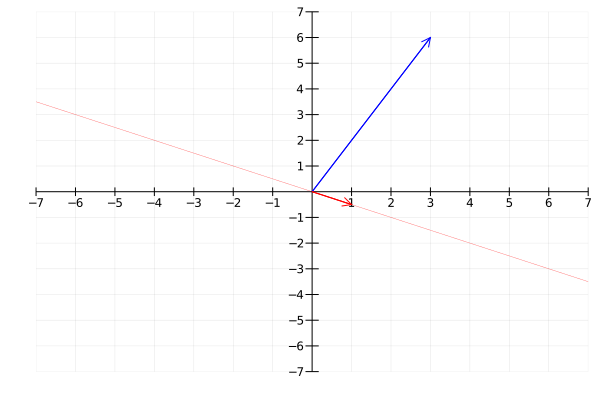

In [92]:
r1 = range(-7,7, length=10)
r2 = -r1/2
r3 = -r1/2 .+ 1.5
#x_vals = [0 0 ; b[1] y[1]]
#y_vals = [0 0 ; b[2] y[2]]

plot([0, y[1]], [0, y[2]], arrow = true, color = :blue,
     legend = :none, xlims = (-7, 7), ylims = (-7, 7),
     xticks = -7:1:7, yticks = -7:1:7,
     framestyle = :origin)
plot!([0 , 1], [0 , -0.5], arrow = true, color = :red)
plot!(r1, r2, color = :red, lw = 0.4, alpha = 0.6)

Notice that the solution to the homogeneous system of linear equations 
$$A x = 0$$

is $$x = (I - A^{\dagger} A) q$$ 

where $q$ is an arbitrary vector. This subspace is shown as the red line above.


The general solution to $Ax = b$ takes the following form

$$ x = A^{\dagger}b + (I - A^{\dagger} A) q$$.

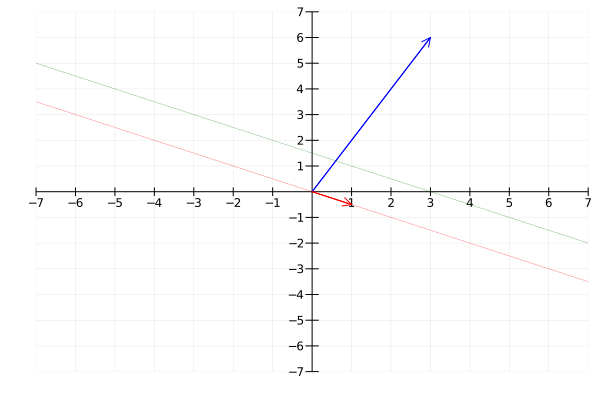

In [93]:
plot!(r1, r3, color = :green, lw = 0.4, alpha = 0.6) 

The MP inverse is unique, i.e., it returns a unique vector living in the subspace given by the green line.

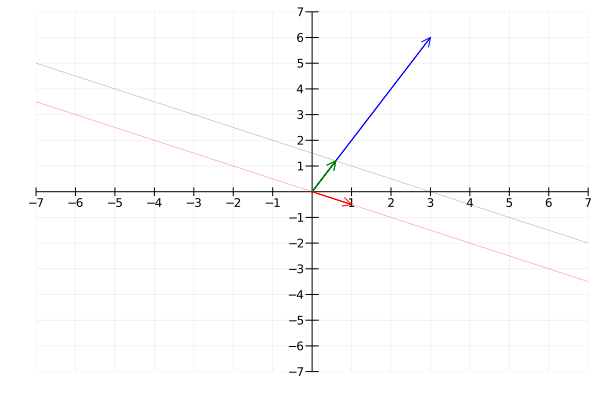

In [102]:
plot!([0 , b[1]], [0 , b[2]], arrow = true, color = :green)

## Exact Identification 

Consider the case where $A$ is an $l\times k$ matrix with full column rank, and $l=k$.

$$ A x = b $$

For example, $A:=Z'X$ and $b:=Z'y$. The solution is given by $x = A^{-1} b$.

## Overidentification

Now consider the case where $l>k$. Let $W$ be a positive definite and symmetric matrix.  Then we can write

$$ W^{1/2} A x = W^{1/2} b$$ 
$$ A' W^{1/2} W^{1/2} A x = A' W^{1/2}  W^{1/2} b$$ 
$$ A' W A x = A' W b$$ 

Now $A' W A $ is a square matrix with full rank $k$, so we can invert it. Then

$$x = (A' W A)^{-1} A' W b$$

where $A^{g} = (A' W A)^{-1} A'$.


We'll see the conditions we need so that the generalized inverse $A^g$ is a MP inverse of $A$.  Let's check the four rules that any generalized inverse must satisfy.

1. $A A^g A = A (A'WA)^{-1} A'W A = A$
2. $A^g A A^g = (A'WA)^{-1} A'WA (A'WA)^{-1} A'W = A^g$
3. $A^g A$ must be symmetric, which is the case since it equals the identity matrix.
4. $AA^g$ must be symmetric. Notice that the following equation only holds if $W=I$.

$$ A(A'WA)^{-1}A'W= W'A (A'WA)^{-1} A'$$


Hence, the MP inverse of $A$ iss given by

$$A^{\dagger} = (A'A)^{-1} A'$$.

Another useful thing to keep in mind is that if $X$ has full column rank, then so does $X'X$. To see this, consider some $z \in N(X)$, i.e., $X z = 0$.  Then, notice that $X'X z = 0$ as well. This implies that $N(X) \subseteq N(X'X)$. 

Similarly, take some $w \in N(X'X)$, i.e., $X'X w=0$. Then we can see that $w' X'X w = 0$, so it follows that $Xw =0$. This implies that $N(X'X) \subseteq N(X)$.  

Finally, $N(X) = N(X'X)$ so the result follows by the rank nullity theorem.

# More Julia Stuff

## Going from summation to matrices

Let $Z_i$ be a vector of size $l$, and $u_i$ be a scalar. Let  $$\hat{\Omega} = \frac{1}{n} \sum_{i=1}^n u_i^2 Z_i Z_i'$$


We can rewrite

$$
\begin{align}
\hat{\Omega} &= \frac{1}{n} \sum_{i=1}^n (u_i Z_i) (u_i Z_i)' \\
&= \frac{1}{n} \sum_{i=1}^n \tilde{Z}_i \tilde{Z}_i' \\
&= \frac{1}{n}\tilde{Z}' \tilde{Z}
\end{align}
$$

so in Julia we can use the original matrix $Z$ and redefine

$$
\begin{align}
\tilde{Z} &= \left( \begin{array}{c}  Z_1' \times u_1 \\ \vdots \\ Z_n' \times u_n  \end{array} \right) \\
&= \left( \begin{array}{c}  Z_1' \\ \vdots \\ Z_n'  \end{array} \right) .^* u \\
&= Z .^* u
\end{align}
$$

In other words, we can just broadcast this operation instead of doing a loop!

## Generate some DGPs

This is just to show that you should be careful about the object types when you simulate your data generating process. To work with linear algebra stuff in Julia we need the elements of our Arrays to be numbers (Int, Float, etc.). 

In [95]:
using Distributions
W = rand(Uniform(0,1),10);

10-element Array{Float64,1}:
 0.6946884032304885
 0.18149098029720667
 0.7745195465942998
 0.37108733981599484
 0.39710056729143983
 0.8929561083161668
 0.1517246695646679
 0.12368521958931034
 0.5568180425564151
 0.6187212001024505

In [96]:
W.<0.2

10-element BitArray{1}:
 0
 1
 0
 0
 0
 0
 1
 1
 0
 0

In [97]:
1*(W.<0.2)

10-element Array{Int64,1}:
 0
 1
 0
 0
 0
 0
 1
 1
 0
 0

In [98]:
W.==0.1

10-element BitArray{1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [99]:
1*(W.==0.1)

10-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

## About Functions

In [110]:
function f1()
    w =5 
    z= 6
    return w,z
end

f1 (generic function with 1 method)

In [107]:
result = f1()

(5, 6)

In [108]:
result[1]

5

In [109]:
result1, result2 = f1()

(5, 6)

In [111]:
using Parameters
@unpack w , z = f1()

LoadError: type Tuple has no field w

In [114]:
function f2()
    w =5 
    z= 6
    return (w = w ,z = z)
end

f2 (generic function with 1 method)

In [115]:
@unpack w , z = f2()


(w = 5, z = 6)

In [116]:
w

5

# Solving Linear Systems of Equations

Usually our moment conditions leave us with something that looks like a linear system of equations.  For instance, in the case of OLS we have the following system: 

$$ X'X * \beta  = X'Y $$

which can be rewritten as 

$$ A x  = b $$ 


We say a matrix is **ill-conditioned** if the basis of eigenvectors are close to, but not exactly, collinear. This can create numerical errors roughly in proportion to the base-10 log of the condition number. I don't think this is gonna be an issue in any of the computations you will perform in the course, but these type of issues can arise when we are, for instance, running models with many fixed effects (high dimensional FE). 


The condition number (using the 2-norm) can be computed as 

$$ k(A) = || A || * || A^{-1} || $$

In [117]:
#Create ill-conditioned matrix
ϵ = 1E-6
A = [1.0 0.0
     1.0 ϵ]
cond(A)

2.0000000000005004e6

In [118]:
#Notice that it has both huge and tiny values!
inv(A)

2×2 Array{Float64,2}:
  1.0    0.0
 -1.0e6  1.0e6

This is actually one of the reasons to avoid using `inv()` in practice, and instead use the backslash notation, which will perform better. Another reason is that if the A matrix is sparse, we make it dense when we invert it. The backslash notation will exploit the fact that A was sparse in the first place!

### Factorization

One way to fix this is to do a factorization, which will allow us to compute a more stable inverse (like a triangular matrix). For instance, a QR decomposition splits A into an orthogonal matrix (inverse = transpose) and an upper triangular matrix. The solution is then simplified as

$$ Q R x  = b $$ 
$$ R x  = Q^{T} * b $$
$$ x = R^{-1}  Q^{T} * b $$

In [119]:
illX = [ones(1000)'; ϵ * I]'
illXX = illX'illX;
illXY = illX' * rand(1000,1);

Q, R = qr(illXX);
βsol_qr = R \ (Q'* illXY)


1001×1 Array{Float64,2}:
      0.1073576534343865
 520406.82018968934
 673111.7536681674
  85549.28789318197
 510225.1497039843
 -46966.9771868138
  22971.5068072717
  73678.14143889937
 707051.5809004102
  -2041.3849602669961
 388865.4998224919
 537178.7931178698
  81434.53819611743
      ⋮
 415302.0460727626
 197768.0043073529
 406934.39223673264
 231084.51821329343
  62521.22458942855
 802541.4021450827
 348066.9094676651
 719331.3753645847
 665832.4116361004
 280774.59751156013
 203784.29270252542
 474985.68807339447

In [120]:
cond(illXX)

3.229517786600101e29

In [121]:
cond(R)

2.873181747420282e30

In [131]:
cond(R) > cond(illXX)

true

Depending on the particular application and the factorization chosen we can improve a lot the conditioning number.

### Iterative Solution (Krylov Methods)

This is will iterate the system on $x^k$ until it reaches a solution. It is an alternative to factorization. However, it has slow convergence rates when the matrix in the linear system is ill-conditioned. 

A solution to this is to set a matrix $ P $ which has numerically stable inverse. Consider the following case of a right preconditioner P:

$$ A x = b $$
$$ A P^{-1} P  x = b $$
$$ (AP^{-1}) y = b $$ 

so we can use the last equation to solve for $y$ , and then recover $x$ from $P x = y $.

In [123]:
#This creates a sparse matrix with 10% of zeros
using SparseArrays
A = sprand(100, 100, 0.1)   
A = A * A'  
cond(Matrix(A)) #Can be ill conditioned!

81762.65194644351

One of the standard Krylov methods is Conjugate Gradient, which works for symmetric and positive definite matrices. This is exactly the case of our least squares problem!

We can choose among many preconditioners, and there's no really a way to know which is gonna work the best. In this case I'll show the solution using an Algebraic Multigrid (AMG) preconditioner.

In [124]:
using IterativeSolvers, AlgebraicMultigrid

In [125]:
#Initial value
β_init = zeros(100)
b = A * rand(100,1)
P = aspreconditioner(ruge_stuben(A))
sol = cg!(β_init, A, b, Pl = P, log=true, maxiter = 1000)
sol[end]

Converged after 60 iterations.

In [126]:
#Show the vector of coefficients
sol[1]

100-element Array{Float64,1}:
 0.14618746146162323
 0.38399042551871504
 0.8419755710041024
 0.21141026426541434
 0.16121736310024365
 0.15750606374328996
 0.5209443717179683
 0.597741783562583
 0.1150228844735098
 0.9059104883957023
 0.7766012752125033
 0.7297235355713326
 0.8226645554199992
 ⋮
 0.9830636622325325
 0.6658577147415523
 0.7354522780500006
 0.7109933909171906
 0.9044846751151753
 0.5472679169510594
 0.36336429107476087
 0.6439702839850588
 0.7639706576998772
 0.5217983598290009
 0.25189255129396215
 0.8807141182005743

In [129]:
sol2 = cg!(β_init, A, b, Pl = I, log=true, maxiter = 1000)
sol2[end]

Converged after 174 iterations.

In [130]:
sol2[1]

100-element Array{Float64,1}:
 0.14618747859953193
 0.3839904365285735
 0.8419755235968631
 0.21141026328384974
 0.16121742525592037
 0.15750605059913478
 0.5209443571174992
 0.5977418103131188
 0.1150228533081129
 0.9059105165928744
 0.7766012604633002
 0.729723522425655
 0.8226645617076273
 ⋮
 0.9830636287592655
 0.6658577041990746
 0.735452258792957
 0.7109933780145251
 0.904484663286404
 0.5472679319257752
 0.36336442205871966
 0.6439702502364264
 0.7639706667637668
 0.5217982961535963
 0.251892548117401
 0.8807140861774436

Something I would like to point out is that using a preconditioner does not ensure that the number of iterations will reduce.